# Competitive equilibrium with one-period Arrow securities

This notebook is a laboratory for experimenting with instances of  a pure exchange economy with

* Markov endowments

* Complete markets in one period Arrow state-contingent securities

* Discounted expected utility preferences  of a kind often specified in macro and finance

* Common preferences across agents

* Common beliefs across agents

* A CRRA one-period utility function that implies the existence of a representative consumer whose consumption process can be plugged into a formula for the pricing kernel for  one-step Arrow securities and thereby determine equilbrium prices before determing an equilibrium distribution of wealth

* Diverse endowments across agents that provide motivations for reallocating goods across time and Markov states

We impose  enough restrictions to allow us to **Bellmanize** competitive equilibrium prices and quantities

This lets us use  Bellman equations  to compute

* asset prices 

* continuation wealths

* state-by-state natural debt limits 

As usual, we start with Python imports

In [250]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
np.set_printoptions(suppress=True)

### Markov asset prices primer


Let's start with a brief summary of formulas for computing asset prices in
a Markov setting.

The setup assumes the following infrastructure

* Markov states: $s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$ governed by  an $n$-state Markov chain with transition probability

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* A collection $k=1,\ldots, I$ of  $n \times 1$ vectors of  $K$ assets that pay off  $d^k\left(s\right)$  in state $s$



* An $n \times n$ matrix  pricing kernel $Q$ for one-period Arrow securities, where $ Q_{ij}$  = price at time $t$ in state $s_t 
\bar s_i$ of one unit of consumption when $s_{t+1} = \bar s_j$ at time $t+1$ 

At this point, we'll take the pricing kernel $Q$ as exogenous, i.e., determined outside the model

Two examples would be

* $ Q = \beta P $ where $\beta \in (0,1) $

* $Q = S P $ where $S$ is an $n \times n$ matrix of *stochastic discount factors*


We'll write down implications of  Markov asset pricing in a nutshell for two types of assets

  * the price in Markov state $s$ at time $t$ of a **cum dividend** stock that entitles the owner at the beginning of time $t$ to the time $t$ dividend and the option to sell the asset at time $t+1$.  The price evidently satisfies $p^k(\bar s_i) = d^k(\bar s_i) + \sum_j Q_{ij} p^k(\bar s_j) $ which implies that the vector $p^k$ satisfies $p^k = d^k + Q p^k$ which implies the formula 
  
$$
p^k = (I - Q)^{-1} d^k
$$


* the price in Markov state $s$ at time $t$ of an **ex dividend** stock that entitles the owner at the end  of time $t$ to the time $t+1$ dividend and the option to sell the stock at time $t+1$. The  price is 

$$ 
p^k = (I - Q)^{-1} d^k
$$


Below, we describe an equilibrium model with trading of one-period Arrow securities in which the pricing kernel is endogenous.

In constructing our model, we'll repeatedly encounter formulas that remind us of our asset pricing formulas.

**Apology:** below we'll recycle notation by using $i$ both as a subscript of the Markov
state $\bar s_i$ and as the name of an individual consumer.  We hope that this does not cause undue confusion. 



## General equilibrium model (pure exchange)

### Inputs

* Markov states: $s \in S = \left[\bar{s}_1, \ldots, \bar{s}_n \right]$ governed by  an $n$-state Markov chain with transition probability

$$
P_{ij} = \Pr \left\{s_{t+1} = \bar{s}_j \mid s_t = \bar{s}_i \right\}
$$

* A collection of  $n \times 1$ vectors of individual $i$ endowments: $y^i\left(s\right), i=1,\ldots, I$

* An $n \times 1$ vector of aggregate endowment:  $y\left(s\right) \equiv \sum_{i=1}^I y^i\left(s\right)$

* A collection of  $n \times 1$ vectors of individual $i$ consumptions: $c^i\left(s\right), i=1,\ldots, I$

* A collection of restrictions  on feasible consumption allocations for $s \in S$:

$$
c\left(s\right)= \sum_{i=1}^I c^i\left(s\right) 
\leq  y\left(s\right) 
$$

* Preferences: a common utility functional across agents $ E_0 \sum_{t=0}^\infty \beta^t u(c^i_t) $ with  CRRA one-period utility function $u\left(c\right)$ and discount factor $\beta \in (0,1)$


### Outputs

* An $n \times n$ matrix  pricing kernel $Q$ for one-period Arrow securities, where $ Q_{ij}$  = price at time $t$ in state $s_t 
\bar s_i$ of one unit of consumption when $s_{t+1} = \bar s_j$ at time $t+1$ 

*  pure exchange so that $c\left(s\right) = y\left(s\right)$

* an $I \times 1$ vector distribution of wealth vector $\alpha$, $\alpha_i \geq 0, \sum_{i=1}^I \alpha_i =1$

* A collection of $n \times 1$ vectors of individual $i$ consumptions: $c^i\left(s\right), i=1,\ldots, I$


The one-period utility function is 

$$
u \left(c\right) = \frac{c^{1-\gamma}}{1-\gamma}
$$

so that

$$
u^\prime \left(c\right) = c^{-\gamma}
$$

#### Matrix $Q$ to represent pricing kernel


For any agent  $k \in \left[1, \ldots, I\right]$, at the equilibrium allocation,
the one-period Arrow securities pricing kernel satisfies

$$
Q_{ij} = \beta \left(\frac{c^k\left(\bar{s}_j\right)}{c^k\left(\bar{s}_i\right)}\right)^{-\gamma} P_{ij}
$$
where $Q$ is an $n \times n$ matrix


This follows from agent $k$'s first-order necessary conditions.

But with the CRRA preferences that we have assumed, individual consumptions vary proportionately
with aggregate consumption and therefore with the aggregate endowment.

  * This is a consequence of our preference specification implying that **Engle curves** affine in wealth and therefore  satisfy conditions for **Gorman aggregation**

Thus, 

$$
c^i \left(s\right) = \alpha_i c\left(s\right) = \alpha_i y\left(s\right)
$$

for an arbitrary   **distribution of wealth**  in the form of an   $I \times 1$ vector $\alpha$ 
that satisfies

$$ \alpha_i \in \left(0, 1\right), \quad \sum_{i=1}^I \alpha_i = 1 $$


This means that we can compute the pricing kernel from  

$$
Q_{ij} = \beta \left(\frac{y_j}{y_i}\right)^{-\gamma} P_{ij}
$$


Note that $Q_{ij}$ is independent of vector $\alpha$.

Thus, we have the

**Key finding:** We can compute competitive equilibrium prices prior to computing the distribution of wealth.


### Values 


Having computed an equilibrium pricing kernel $Q$, we can compute several **values** that are required
to pose or represent the solution of an individual household's optimum problem. 


We denote  an $I \times 1$ vector of  state-dependent values of agents' endowments in Markov state $s$ as

$$
A\left(s\right)=\left[\begin{array}{c}
A^{1}\left(s\right)\\
 \vdots\\
A^{I}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

and an  $n \times 1$ vector of continuation endowment values for each individual $i$ as

$$
A^{i}=\left[\begin{array}{c}
A^{i}\left(\bar{s}_{1}\right)\\
\vdots\\
A^{i}\left(\bar{s}_{n}\right)
\end{array}\right], \quad i \in \left[1, \ldots, I\right]
$$

  $A^i$ of consumer $i$ satisfies

$$
A^i = \left[I - Q\right]^{-1} \left[ y^i\right]
$$

where

$$
y^{i}=\left[\begin{array}{c}
y^{i}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{i}\left(\bar{s}_{n}\right)
\end{array}\right]
$$


In a competitive equilibrium with sequential trading of one-period Arrow securities, 
$A^i(s)$ serves as a state-by-state vector of **debt limits** on the quantities of one-period  Arrow securities
paying off  in state $s$ at time $t+1$ that individual $i$ can issue at time $t$.  


These are often called **natural debt limits**.

Evidently, they equal the maximum amount that it is feasible for  individual $i$ to repay
even if he consumes zero goods forevermore. 

### Continuation wealths

Continuation wealths play an important role in Bellmanizing a competitive equilibrium with sequential
trading of a complete set of one-period Arrow securities.


We denote  an $I \times 1$ vector of  state-dependent continuation wealths in Markov state $s$ as

$$
\psi\left(s\right)=\left[\begin{array}{c}
\psi^{1}\left(s\right)\\
\vdots\\
\psi^{I}\left(s\right)
\end{array}\right], \quad s \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]
$$

and an  $n \times 1$ vector of continuation wealths for each individual $i$ as

$$
\psi^{i}=\left[\begin{array}{c}
\psi^{i}\left(\bar{s}_{1}\right)\\
\vdots\\
\psi^{i}\left(\bar{s}_{n}\right)
\end{array}\right], \quad i \in \left[1, \ldots, I\right]
$$

Continuation wealth  $\psi^i$ of consumer $i$ satisfies

$$
\psi^i = \left[I - Q\right]^{-1} \left[\alpha^i y - y^i\right]
$$

where

$$
y^{i}=\left[\begin{array}{c}
y^{i}\left(\bar{s}_{1}\right)\\
\vdots\\
y^{i}\left(\bar{s}_{n}\right)
\end{array}\right],\quad y=\left[\begin{array}{c}
y\left(\bar{s}_{1}\right)\\
\vdots\\
y\left(\bar{s}_{n}\right)
\end{array}\right]
$$

Note that $\sum_{i=1}^I \psi^i = \boldsymbol{0}_{n \times 1}$.

**Remark:** At the initial state $s_0 \in \begin{bmatrix} \bar s_1, \ldots, \bar s_n \end{bmatrix}$.
the continuation wealth $\psi^i(s_0) = 0$ for all agents $i = 1, \ldots, I$.  This indicates that
the economy begins with  all agents being debt-free and financial-asset-free at time $0$, state $s_0$.  


**Remark:** Note that all agents' continuation wealths recurrently return to zero when the Markov state returns to whatever value $s_0$ it had at time $0$.


### Optimal portfolios

A nifty feature of the model is that optimal portfolios for a type $i$ agent equal
the continuation wealths that we have just computed.

Thus, agent $i$'s state-by-state purchases of Arrow securities next period depend only on next period's
Markov state and equal

$$ a^i(s) = \psi^i(s), s \in \left[\bar s_1, \ldots, \bar s_n \right] $$



### Equilibrium wealth distribution $\alpha$


With the initial state being  a particular state $s_0 \in \left[\bar{s}_1, \ldots, \bar{s}_n\right]$, we must have

$$
\psi^i\left(s_0\right) = 0, \quad i=1, \ldots, I
$$

which means the equilibrium distribution of wealth satisfies

$$
\alpha^i = \frac{V_k y^i}{V_k y}
$$

where $V \equiv \left[I - Q\right]^{-1}$ and $k$ is the row index corresponding to the initial state $s_0$. 

Since $\sum_i V_k y^i = V_k y$,  $\sum_i \alpha^i = 1$.

Below we solve several fun examples with Python code.

First, we create a Python class to compute  the objects that comprise a competitive equilibrium
with sequential trading of one-period Arrow securities.

In [252]:
class RecurCompetitive:
    """
    A class that represents a recursive competitive economy
    with one-period Arrow securities.
    """

    def __init__(self,
                 s,        # state vector
                 P,        # transition matrix
                 ys,       # endowments ys = [y1, y2, .., yI]
                 γ=0.5,    # risk aversion
                 β=0.98):  # discount rate

        # preference parameters
        self.γ = γ
        self.β = β

        # variables dependent on state
        self.s = s
        self.P = P
        self.ys = ys
        self.y = np.sum(ys, 1)

        # dimensions
        self.n, self.I = ys.shape

        # compute pricing kernel
        self.Q = self.pricing_kernel()
        
        # compute risk-free rate
        self.R = self.risk_free_rate()

        # V = [I - Q]^{-1}
        self.V = np.linalg.inv(np.eye(n) - self.Q)

        # natural debt limit
        self.A = self.V @ ys

    def u_prime(self, c):
        "The first derivative of CRRA utility"

        return c ** (-self.γ)

    def pricing_kernel(self):
        "Compute the pricing kernel matrix Q"

        c = self.y

        n = self.n
        Q = np.empty((n, n))

        for i in range(n):
            for j in range(n):
                ratio = self.u_prime(c[j]) / self.u_prime(c[i])
                Q[i, j] = self.β * ratio * P[i, j]

        self.Q = Q

        return Q

    def wealth_distribution(self, s0_idx):
        "Solve for wealth distribution α"

        # set initial state
        self.s0_idx = s0_idx

        # simplify notations
        n = self.n
        Q = self.Q
        y, ys = self.y, self.ys

        # row of V corresponding to s0
        Vs0 = self.V[s0_idx, :]
        α = Vs0 @ self.ys / (Vs0 @ self.y)

        self.α = α

        return α

    def continuation_wealths(self):
        "Given α, compute the continuation wealths ψ"

        diff = np.empty((n, I))
        for i in range(I):
            diff[:, i] = self.α[i] * self.y - self.ys[:, i]

        ψ = self.V @ diff
        self.ψ = ψ

        return ψ
    
    def risk_free_rate(self):
        "Given Q, compute one-period gross risk-free interest rate R"
        R = np.empty((n,n))
        R = np.sum(self.Q, axis = 0) 
        self.R = R
        
        return R
    
    

### Example 1

Please read the preceding class for default parameter values and the  following Python code for the fundamentals of the economy.  

Here goes.

In [253]:
# dimensions
I, n = 2, 2

# states
s = np.array([0, 1])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, I))
ys[:, 0] = 1 - s       # y1
ys[:, 1] = s           # y2

In [254]:
ex1 = RecurCompetitive(s, P, ys)

In [255]:
# endowments
ex1.ys

array([[1., 0.],
       [0., 1.]])

In [256]:
# pricing kernal
ex1.Q

array([[0.49, 0.49],
       [0.49, 0.49]])

In [257]:
# Risk free rate R
ex1.R

array([0.98, 0.98])

In [258]:
# natural debt limit, A = [A1, A2, ..., AI]
ex1.A

array([[25.5, 24.5],
       [24.5, 25.5]])

In [259]:
# when the initial state is state 1
print(f'α = {ex1.wealth_distribution(s0_idx=0)}')
print(f'ψ = {ex1.continuation_wealths()}')

α = [0.51 0.49]
ψ = [[ 0.  0.]
 [ 1. -1.]]


In [260]:
# when the initial state is state 2
print(f'α = {ex1.wealth_distribution(s0_idx=1)}')
print(f'ψ = {ex1.continuation_wealths()}')

α = [0.49 0.51]
ψ = [[-1.  1.]
 [ 0. -0.]]


### Example 2

In [261]:
# dimensions
I, n = 2, 2

# states
s = np.array([1, 2])

# transition
P = np.array([[.5, .5], [.5, .5]])

# endowments
ys = np.empty((n, I))
ys[:, 0] = 1.5         # y1
ys[:, 1] = s           # y2

In [262]:
ex2 = RecurCompetitive(s, P, ys)

In [263]:
# endowments

print("ys = ", ex2.ys)

# pricing kernal
print ("Q = ", ex2.Q)

# Risk free rate R
print("R = ", ex2.R)

ys =  [[1.5 1. ]
 [1.5 2. ]]
Q =  [[0.49       0.41412558]
 [0.57977582 0.49      ]]
R =  [1.06977582 0.90412558]


In [264]:
# pricing kernal
ex2.Q

array([[0.49      , 0.41412558],
       [0.57977582, 0.49      ]])

In [265]:
# Risk free rate R
ex2.R

array([1.06977582, 0.90412558])

In [266]:
# natural debt limit, A = [A1, A2, ..., AI]
ex2.A

array([[69.30941886, 66.91255848],
       [81.73318641, 79.98879094]])

In [267]:
# when the initial state is state 1
print(f'α = {ex2.wealth_distribution(s0_idx=0)}')
print(f'ψ = {ex2.continuation_wealths()}')

α = [0.50879763 0.49120237]
ψ = [[-0.         -0.        ]
 [ 0.55057195 -0.55057195]]


In [268]:
# when the initial state is state 1
print(f'α = {ex2.wealth_distribution(s0_idx=1)}')
print(f'ψ = {ex2.continuation_wealths()}')

α = [0.50539319 0.49460681]
ψ = [[-0.46375886  0.46375886]
 [ 0.         -0.        ]]


### Example 3

In [269]:
# dimensions
I, n = 2, 2

# states
s = np.array([1, 2])

# transition
λ = 0.9
P = np.array([[1-λ, λ], [0, 1]])

# endowments
ys = np.empty((n, I))
ys[:, 0] = [1, 0]         # y1
ys[:, 1] = [0, 1]         # y2

In [270]:
ex3 = RecurCompetitive(s, P, ys)

In [271]:
# endowments

print("ys = ", ex3.ys)

# pricing kernel
print ("Q = ", ex3.Q)

# Risk free rate R
print("R = ", ex3.R)

ys =  [[1. 0.]
 [0. 1.]]
Q =  [[0.098 0.882]
 [0.    0.98 ]]
R =  [0.098 1.862]


In [272]:
# pricing kernel
ex3.Q

array([[0.098, 0.882],
       [0.   , 0.98 ]])

In [273]:
# natural debt limit, A = [A1, A2, ..., AI]
ex3.A

array([[ 1.10864745, 48.89135255],
       [ 0.        , 50.        ]])

Note that the natural debt limit for agent $1$ in state $2$ is $0$.

In [274]:
# when the initial state is state 1
print(f'α = {ex3.wealth_distribution(s0_idx=0)}')
print(f'ψ = {ex3.continuation_wealths()}')

α = [0.02217295 0.97782705]
ψ = [[ 0.         -0.        ]
 [ 1.10864745 -1.10864745]]


In [275]:
# when the initial state is state 1
print(f'α = {ex3.wealth_distribution(s0_idx=1)}')
print(f'ψ = {ex3.continuation_wealths()}')

α = [0. 1.]
ψ = [[-1.10864745  1.10864745]
 [ 0.          0.        ]]


For the specification of the Markov chain in example 3, let's take a look at how the equilibrium allocation changes as a function of transition probability $\lambda$.

In [276]:
λ_seq = np.linspace(0, 1, 100)

# prepare containers
αs0_seq = np.empty((len(λ_seq), 2))
αs1_seq = np.empty((len(λ_seq), 2))

for i, λ in enumerate(λ_seq):
    P = np.array([[1-λ, λ], [0, 1]])
    ex3 = RecurCompetitive(s, P, ys)

    # initial state s0 = 1
    α = ex3.wealth_distribution(s0_idx=0)
    αs0_seq[i, :] = α

    # initial state s0 = 2
    α = ex3.wealth_distribution(s0_idx=1)
    αs1_seq[i, :] = α

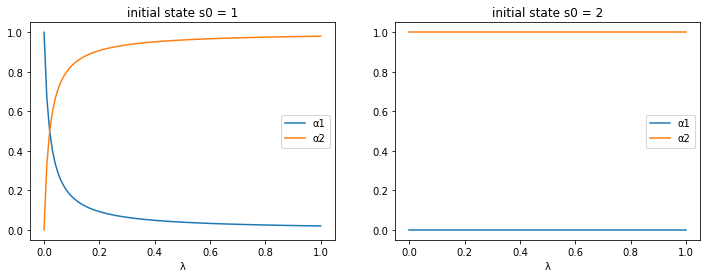

In [277]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i, αs_seq in enumerate([αs0_seq, αs1_seq]):
    for j in range(2):
        axs[i].plot(λ_seq, αs_seq[:, j], label=f'α{j+1}')
        axs[i].set_xlabel('λ')
        axs[i].set_title(f'initial state s0 = {s[i]}')
        axs[i].legend()

plt.show()

## Example 4

In [278]:
# dimensions
I, n = 2, 3

# states
s = np.array([1, 2, 3])

# transition
λ = 0.9
μ = .9
δ = .05

P = np.array([[1-λ, λ, 0], [μ/2, μ, μ/2], [δ/2, δ/2, δ]])

# endowments
ys = np.empty((n, I))
ys[:, 0] = .25, .75, .2       # y1
ys[:, 1] = 1.25, .25, .2           # y2


In [279]:
ex4 = RecurCompetitive(s, P, ys)

In [280]:
# endowments

print("ys = ", ex4.ys)

# pricing kernal
print ("Q = ", ex4.Q)

# Risk free rate R
print("R = ", ex4.R)
ex4.R

# natural debt limit, A = [A1, A2, ..., AI]
ex4.A

# when the initial state is state 1
print("when the initial state is state 1")
print(f'α = {ex4.wealth_distribution(s0_idx=0)}')
print(f'ψ = {ex4.continuation_wealths()}')

# when the initial state is state 2
print("when the initial state is state 2")
print(f'α = {ex4.wealth_distribution(s0_idx=1)}')
print(f'ψ = {ex4.continuation_wealths()}')

# when the initial state is state 3
print("when the initial state is state 3")
print(f'α = {ex4.wealth_distribution(s0_idx=2)}')
print(f'ψ = {ex4.continuation_wealths()}')


ys =  [[0.25 1.25]
 [0.75 0.25]
 [0.2  0.2 ]]
Q =  [[0.098      1.08022498 0.        ]
 [0.36007499 0.882      0.69728222]
 [0.01265175 0.01549516 0.049     ]]
R =  [0.47072674 1.97772014 0.74628222]
when the initial state is state 1
α = [0.63920196 0.36079804]
ψ = [[-0.          0.        ]
 [-0.65616233  0.65616233]
 [ 0.04785851 -0.04785851]]
when the initial state is state 2
α = [0.52372722 0.47627278]
ψ = [[ 0.5937814  -0.5937814 ]
 [ 0.          0.        ]
 [ 0.01787935 -0.01787935]]
when the initial state is state 3
α = [0.45485896 0.54514104]
ψ = [[ 0.94790813 -0.94790813]
 [ 0.39133024 -0.39133024]
 [-0.         -0.        ]]
